<a href="https://colab.research.google.com/github/IBM-EPBL/IBM-Project-24971-1659951514/blob/master/Assessments/M1_Lead/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS SPAM Classification

### Problem Statement

Over recent years, as the popularity of mobile phone devices has increased, Short
Message Service (SMS) has grown into a multi-billion dollar industry. At the same time,
reduction in the cost of messaging services has resulted in growth in unsolicited
commercial advertisements (spams) being sent to mobile phones. Due to Spam SMS,
Mobile service providers suffer from some sort of financial problems as well as it reduces
calling time for users. Unfortunately, if the user accesses such Spam SMS they may face
the problem of virus or malware. When SMS arrives at mobile it will disturb mobile user
privacy and concentration. It may lead to frustration for the user. So Spam SMS is one of
the major issues in the wireless communication world and it grows day by day.

1) Download dataset

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving spam.csv to spam.csv


2) Import required library

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

3) Read dataset and do pre-processing

The file contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [3]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unnecessary columns

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Analyzing the dataset  
**Ham message** - that are not spam and are wanted by the recepient  
**Spam message** - any kind of unwanted, unsolicited digital communication that gets sent out in bulk.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency of ham and spam messages')

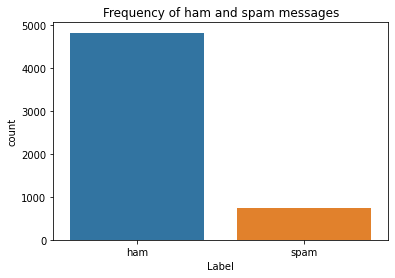

In [5]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Frequency of ham and spam messages')

4) Create model

a) Create input and output vectors  
b) Process the labels

In [51]:
messages = df.v2
message_type = df.v1
le = LabelEncoder()
# message_type = le.fit_transform(message_type)
# message_type = message_type.reshape(-1,1)

Splitting the dataset into train and test set

In [52]:
X_train,X_test,Y_train,Y_test = train_test_split(messages,message_type,test_size=0.15)

Process the data
 

*   Tokenize the data and convert the text to sequences
*   Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [53]:
X_train

3415     Uhhhhrmm isnt having tb test bad when youre sick
4419                      Ok i msg u b4 i leave my house.
1405                             K..k..any special today?
4290                            Call me when u're done...
2186    So is there anything specific I should be doin...
                              ...                        
3299                  Just do what ever is easier for you
1517    Our brand new mobile music service is now live...
5283                      Yeah, probably here for a while
765     UR awarded a City Break and could WIN a å£200 ...
5563                                  Ard 6 like dat lor.
Name: v2, Length: 4736, dtype: object

In [55]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
# tokenizer = Tokenizer(num_words=100)
# tokenizer.fit_on_texts(messages)
# X_train= tokenizer.texts_to_sequences(X_train)
# X_test= tokenizer.texts_to_sequences(X_test) 
# maxlen=10
# X_train=pad_sequences(X_train,padding='post', maxlen=maxlen)
# X_test=pad_sequences(X_test,padding='post', maxlen=maxlen)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)



In [70]:
sequences_matrix[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 301, 482, 374,  45], dtype=int32)

RNN

In [58]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [67]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
model.
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

In [73]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))